In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import string
import cv2 as cv

# 2-D Transforms

In [2]:
# points a, b, c and d
a, b, c, d = (0,0,1), (0,1,1), (1,1,1), (1,0,1)

# matrix with rox vectors of points
P = np.array([a, b, c, d]).T

In [8]:
# 90-degrees rotation
t1 = np.pi/3
H1 = [[np.cos(t1), np.sin(t1), 0.], [-np.sin(t1), np.cos(t1), 0.], [0., 0., 1.]]

# 
t2 = np.pi/6
H2 = [[np.cos(t2), np.sin(t2), 0.], [-np.sin(t2), np.cos(t2), 0.], [0., 0., 1.]]

t3 = np.pi/2
H3 = [[np.cos(t3), np.sin(t3), 0.], [-np.sin(t3), np.cos(t3), 0.], [0., 0., 1.]]

t4 = np.pi
H4 = [[np.cos(t4), np.sin(t4), 0.], [-np.sin(t4), np.cos(t4), 0.], [0., 0., 1.]]

t5 = 3*np.pi/2
H5 = [[np.cos(t5), np.sin(t5), 0.], [-np.sin(t5), np.cos(t5), 0.], [0., 0., 1.]]

t6 = 5*np.pi/2
H6 = [[np.cos(t6), np.sin(t6), 0.], [-np.sin(t6), np.cos(t6), 0.], [0., 0., 1.]]

In [9]:
Pt1 = np.matmul(H1, P)
Pt2 = np.matmul(H2, P)
Pt3 = np.matmul(H3, P)
Pt4 = np.matmul(H4, P)
Pt5 = np.matmul(H5, P)
Pt6 = np.matmul(H6, P)

In [10]:
P = P/P[-1, :]
P = np.insert(P, 4, P[:,0], axis=1)
x = P[0, :]
y = P[1, :]

In [11]:
Pt1 = Pt1/Pt1[-1, :]
Pt1 = np.insert(Pt1, 4, Pt1[:,0], axis=1)
xt1 = Pt1[0, :]
yt1 = Pt1[1, :]

Pt2 = Pt2/Pt2[-1, :]
Pt2 = np.insert(Pt2, 4, Pt2[:,0], axis=1)
xt2 = Pt2[0, :]
yt2 = Pt2[1, :]

Pt3 = Pt3/Pt3[-1, :]
Pt3 = np.insert(Pt3, 4, Pt3[:,0], axis=1)
xt3 = Pt3[0, :]
yt3 = Pt3[1, :]

Pt4 = Pt4/Pt4[-1, :]
Pt4 = np.insert(Pt4, 4, Pt4[:,0], axis=1)
xt4 = Pt4[0, :]
yt4 = Pt4[1, :]

Pt5 = Pt5/Pt5[-1, :]
Pt5 = np.insert(Pt5, 4, Pt5[:,0], axis=1)
xt5 = Pt5[0, :]
yt5 = Pt5[1, :]

Pt6 = Pt6/Pt6[-1, :]
Pt6 = np.insert(Pt6, 4, Pt6[:,0], axis=1)
xt6 = Pt6[0, :]
yt6 = Pt6[1, :]

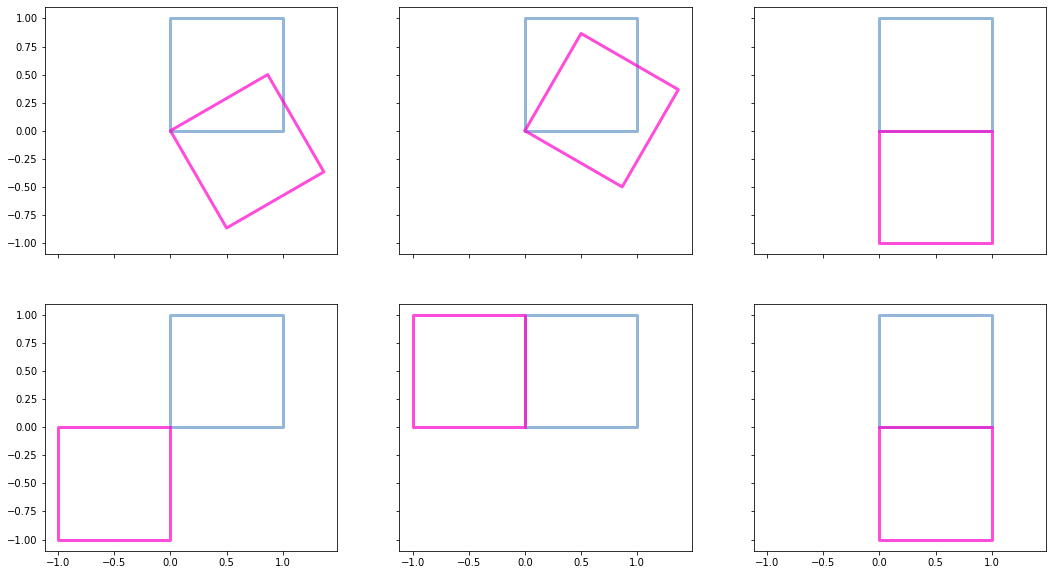

In [18]:
fig,ax = plt.subplots(2,3, sharex=True, sharey=True, figsize=(18,10))

ax[0,0].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[0,0].plot(xt1, yt1, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[0,0].set_aspect('equal')

ax[0,1].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[0,1].plot(xt2, yt2, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[0,1].set_aspect('equal')

ax[0,2].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[0,2].plot(xt3, yt3, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[0,2].set_aspect('equal')

ax[1,0].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[1,0].plot(xt4, yt4, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[1,0].set_aspect('equal')

ax[1,1].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[1,1].plot(xt5, yt5, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[1,1].set_aspect('equal')

ax[1,2].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[1,2].plot(xt6, yt6, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2)
ax[1,2].set_aspect('equal')

plt.savefig('images/2Dtransform.png')
plt.show()

# Warping Using a Given Homography

In [20]:
im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

with open('images/graf/H1to4p') as f:
    H = [[float(x) for x in line.split()] for line in f]
N = np.array(H)
print(N)

[[ 6.6378505e-01  6.8003334e-01 -3.1230335e+01]
 [-1.4495500e-01  9.7128304e-01  1.4877420e+02]
 [ 4.2518504e-04 -1.3930359e-05  1.0000000e+00]]


In [23]:
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
cv.imwrite('images/Q2im5WarpBf.jpg',im5_warped)
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.imwrite('images/Q2im1.jpg',im1)
cv.imwrite('images/Q2im5.jpg',im5)
cv.imwrite('images/Q2im5Warp.jpg',im5_warped)

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 5', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 5', im5)
cv.waitKey(0)
cv.namedWindow('Image 5 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 5 Warped', im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

# Computing the Homography Using Mouse-Clicked Points and Warping

In [25]:
N = 5
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im5copy = im5.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)

while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

cv.imwrite('images/Q3im1.jpg',im1copy)
cv.imwrite('images/Q3im5.jpg',im5copy)

print(p1)
print(p2)

cv.destroyAllWindows()

NameError: name 'im4copy' is not defined

In [ ]:
H,_ = cv.findHomography(p1,p2)
im5_warped = cv.warpPerspective(im5, H, (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 5', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 5', im5)
cv.waitKey(0)
cv.namedWindow('Image 5 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 5 Warped', im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

# Computing the Homography Using Mouse-Clicked Points without OpenCV

In [46]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)

A = np.empty((2*N, 9))

cv.destroyAllWindows()

[[516. 347.]
 [522. 189.]
 [330. 153.]
 [188. 140.]
 [226. 385.]]
[[349. 449.]
 [175. 238.]
 [363. 209.]
 [254. 218.]
 [452. 338.]]
